In [2]:
import datetime
import mysql.connector
import operator
import numpy as np
import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [3]:
def run_query(query):
    return pd.read_sql_query(query,db)

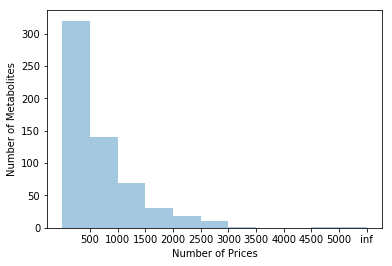

In [41]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

cursor = cnx.cursor()


query = ('''select "1-500" as priceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 1 and 499
            union (
            select "500-1000" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 500 and 999)
            union (
            select "1000-1500" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 1000 and 1499)
            union (
            select "1500-2000" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 1500 and 1999)
            union (
            select "2000-2500" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 2000 and 2499)
            union (
            select "2500-3000" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 2500 and 2999)
            union (
            select "3000-3500" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 3000 and 3499)
            union (
            select "3500-4000" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 3500 and 3999)
            union (
            select "4000-4500" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 4000 and 4499)
            union (
            select "4500-5000" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price between 4500 and 4999)
            union (
            select "5000-inf" as PriceRange, count(num_metab_num_price.num_metab) as num_metab from bioeco.num_metab_num_price
               where num_metab_num_price.num_price >= 5000);''')
num_price = []
num_met = []

cursor.execute(query)


for (priceRange, num_metab) in cursor:
    num_price.append(priceRange)
    num_met.append(num_metab)

    
plt.bar(['500','1000','1500','2000','2500','3000','3500','4000','4500','5000','inf'], num_met, align='edge', alpha=0.4, width = -1)   
plt.xlabel("Number of Prices")
plt.ylabel("Number of Metabolites")
plt.show()

    
cursor.close()    
cnx.close()